### Importation des bibliothèques et des modules
Nous utiliserons ces modules pour nous aider à manipuler les données et à visualiser les caractéristiques ainsi qu'à mesurer la performance de notre modèle. Numpy et Pandas sont utiles pour manipuler les jeux de donnée, ses colonnes et cellules. Nous utiliserons matplotlib avec Seaborn pour visualiser nos données.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("data"))

['2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv', 'clean-building-energy-benchmarking.csv', 'socrata_metadata_2015-building-energy-benchmarking.json', 'socrata_metadata_2016-building-energy-benchmarking.json']


In [2]:
raw_2015 = pd.read_csv("data/2015-building-energy-benchmarking.csv")
data_2015 = raw_2015.copy()
raw_2016 = pd.read_csv("data/2016-building-energy-benchmarking.csv")
data_2016 = raw_2016.copy()

In [3]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Premier tri fonctionnel

In [5]:
def difference_columns(df1, df2):
    print(df1.columns.difference(df2.columns))
    print(df2.columns.difference(df1.columns))

In [6]:
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')
Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')


In [7]:
data_2015.rename(columns={"Zip Codes": "ZipCode", 
                          "Comment": "Comments", 
                          "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity",
                          "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions",
                         }, inplace=True)
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'Location',
       'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index(['Address', 'City', 'Latitude', 'Longitude', 'State'], dtype='object')


In [8]:
longitude, latitude, address, city, state, zipcode = [], [], [], [], [], []
for location in data_2015["Location"]:
    location_dict = eval(location)
    longitude.append(location_dict["longitude"])
    latitude.append(location_dict["latitude"])
    human_address_dict = eval(location_dict["human_address"])
    address.append(human_address_dict['address'])
    city.append(human_address_dict['city'])
    state.append(human_address_dict['state'])
    zipcode.append(human_address_dict['zip'])
data_2015['Longitude'] = longitude
data_2015['Latitude'] = latitude
data_2015['Address'] = address
data_2015['City'] = city
data_2015['State'] = state
data_2015['ZipCode'] = zipcode

In [9]:
data_2015.drop(columns=['Location'], inplace=True)

In [10]:
difference_columns(data_2015, data_2016)

Index(['2010 Census Tracts', 'City Council Districts', 'OtherFuelUse(kBtu)',
       'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas'],
      dtype='object')
Index([], dtype='object')


### Concaténation des datasets

In [11]:
data = pd.concat([data_2015, data_2016], ignore_index=True)

### Gestion des doublons

In [12]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


### Gestion des valeurs manquantes

In [13]:
def null_table(dataframe):
    print("Data Frame")
    print(pd.isnull(dataframe).sum()[pd.isnull(dataframe).sum() != 0])

In [14]:
null_table(data)

Data Frame
2010 Census Tracts                                               6492
City Council Districts                                           6503
Comments                                                         6703
DefaultData                                                         1
ENERGYSTARScore                                                  1623
Electricity(kBtu)                                                  19
Electricity(kWh)                                                   19
GHGEmissionsIntensity                                              19
LargestPropertyUseType                                            156
LargestPropertyUseTypeGFA                                         156
ListOfAllPropertyUseTypes                                         136
NaturalGas(kBtu)                                                   19
NaturalGas(therms)                                                 19
NumberofBuildings                                                   8
NumberofF

In [15]:
def rotate_labels(axes):
    for item in axes.get_xticklabels():
        item.set_rotation(90)

def missing_values_graph(missing_group):
    percent_of_nans = missing_group['percent_of_nans']
    low_nans = missing_group['low_nans']
    middle_nans = missing_group['middle_nans']
    high_nans = missing_group['high_nans']
    zero_nan_features = missing_group['zero_nan_features']
    useless_features = missing_group['useless_features']
        
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.distplot(percent_of_nans, bins=100, kde=False, ax=axs[0, 0])
    axs[0, 0].set(title="Pourcentage de valeur NaN par caractéristiques", xlabel="% de NaN", ylabel="Nombre de caractéristiques")
    
    lows = sns.barplot(x=low_nans.index.values, y=low_nans.values, palette="Greens", ax=axs[0, 1])
    rotate_labels(lows)
    axs[0, 1].set(ylabel="% de NaN", title="Taux faible de NaN")
    
    middle = sns.barplot(x=middle_nans.index.values, y=middle_nans.values, palette="Oranges", ax=axs[1, 0])
    rotate_labels(middle)
    axs[1, 0].set(title="Taux moyen de NaN", ylabel="% de NaN")
    
    high = sns.barplot(y=high_nans.values, x=high_nans.index.values, palette="Reds", ax=axs[1, 1])
    rotate_labels(high)
    axs[1, 1].set(title="Taux élevé de NaN", ylabel="% de NaN")
    
    fig.tight_layout()
    plt.show()
    
    print("Caractéristiques sans valeurs manquantes : \n", zero_nan_features.index.values)
    print("Caractéristiques inutilisables : \n", useless_features.index.values)

def calculate_missing_group(df):
    percent_of_nans = df.isnull().sum().sort_values() / df.shape[0] * 100
    low_nans = percent_of_nans[(percent_of_nans > 0) & (percent_of_nans <=15)]
    middle_nans = percent_of_nans[(percent_of_nans > 15) & (percent_of_nans <= 50)]
    high_nans = percent_of_nans[(percent_of_nans > 50) & (percent_of_nans < 100)]
    zero_nan_features = percent_of_nans[percent_of_nans == 0]
    useless_features = percent_of_nans[percent_of_nans == 100]
    return dict({"percent_of_nans": percent_of_nans, "low_nans": low_nans, 'middle_nans': middle_nans, 'high_nans': high_nans, 'zero_nan_features': zero_nan_features, 'useless_features': useless_features})

In [16]:
missing_group = calculate_missing_group(data)

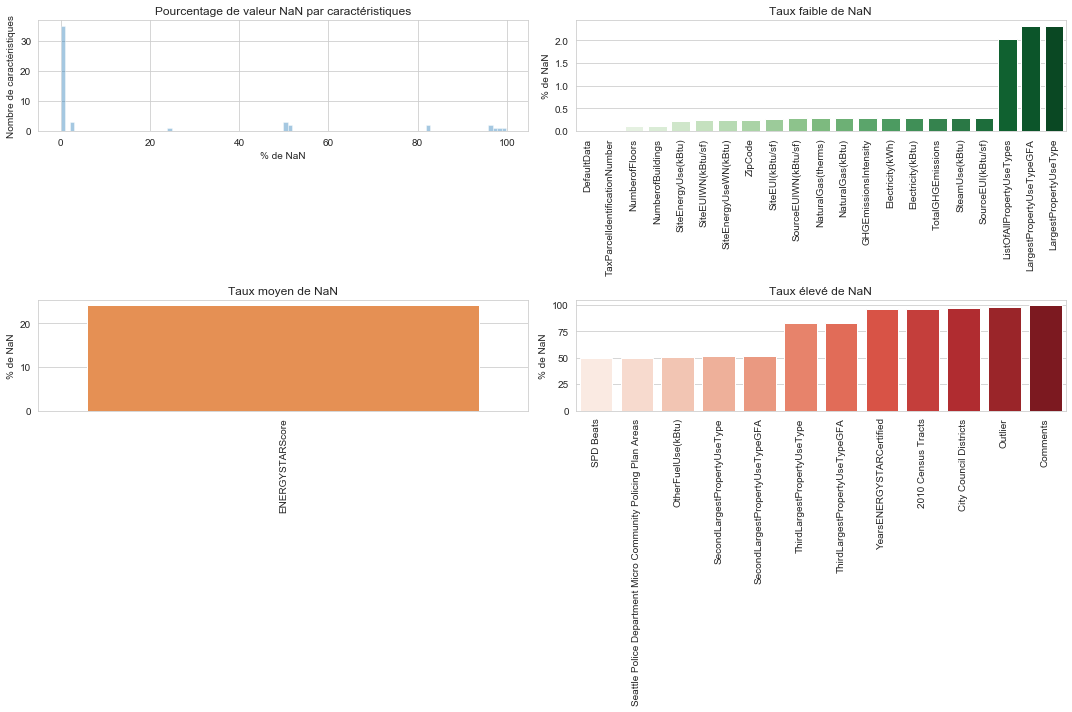

Caractéristiques sans valeurs manquantes : 
 ['State' 'OSEBuildingID' 'Neighborhood' 'PropertyGFABuilding(s)'
 'Longitude' 'PropertyGFAParking' 'Latitude' 'PropertyGFATotal'
 'PropertyName' 'PrimaryPropertyType' 'YearBuilt' 'Address' 'DataYear'
 'CouncilDistrictCode' 'ComplianceStatus' 'City' 'BuildingType']
Caractéristiques inutilisables : 
 []


In [17]:
missing_values_graph(missing_group)

In [18]:
cols_to_keep_from_high = missing_group['high_nans'][missing_group['high_nans'] < 98]
missing_group['high_nans'] = missing_group['high_nans'].drop(labels=cols_to_keep_from_high.index) 

In [19]:
data = data.drop(missing_group['high_nans'].index, axis=1)
data = data.drop(missing_group['useless_features'].index, axis=1)

In [20]:
data.head()

,2010 Census Tracts,Address,BuildingType,City,City Council Districts,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,...,SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,YearsENERGYSTARCertified,ZipCode
0,NaN,405 OLIVE WAY,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,65.0,...,175.1,WA,2023032.0,659000030,NaN,NaN,249.43,1927,NaN,98101
1,NaN,724 PINE ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,51.0,...,195.2,WA,0.0,659000220,Restaurant,4622.0,263.51,1996,NaN,98101
2,NaN,1900 5TH AVE,NonResidential,SEATTLE,NaN,Compliant,7,2015,Yes,18.0,...,246.5,WA,19660404.0,659000475,Swimming Pool,0.0,2061.48,1969,NaN,98101
3,NaN,620 STEWART ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,1.0,...,643.2,WA,23458518.0,659000640,NaN,NaN,1936.34,1926,NaN,98101
4,NaN,401 LENORA ST,NonResidential,SEATTLE,NaN,Compliant,7,2015,No,67.0,...,227.1,WA,0.0,659000970,Swimming Pool,0.0,507.70,1980,NaN,98121


### Suppressions de caractéristiques non pertinentes

Certaines caractéristiques ne vont pas influer sur l'émission de GES ou la consommation électrique, nous allons donc les supprimés.

In [21]:
data.columns

Index(['2010 Census Tracts', 'Address', 'BuildingType', 'City',
       'City Council Districts', 'ComplianceStatus', 'CouncilDistrictCode',
       'DataYear', 'DefaultData', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'Electricity(kWh)', 'GHGEmissionsIntensity', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'Latitude', 'ListOfAllPropertyUseTypes',
       'Longitude', 'NaturalGas(kBtu)', 'NaturalGas(therms)', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'PropertyGFATotal', 'PropertyName', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'State', 'SteamUse(kBtu)', 'Tax

In [22]:
col_to_remove = ["2010 Census Tracts", "CouncilDistrictCode", "City Council Districts", "SPD Beats", 
                 "Seattle Police Department Micro Community Policing Plan Areas", 
                 "TaxParcelIdentificationNumber", "Address", "City", "ComplianceStatus", "Latitude", "Longitude", 
                 "PropertyName", "State", "ZipCode", "DefaultData", "PrimaryPropertyType"]
data = data.drop(col_to_remove, axis=1)

### Gestion des types

In [23]:
data.dtypes

BuildingType                        object
DataYear                             int64
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
ListOfAllPropertyUseTypes           object
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                     float64
OSEBuildingID                        int64
OtherFuelUse(kBtu)                 float64
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SiteEnergyU

In [24]:
data["NumberofBuildings"] = data["NumberofBuildings"].astype('Int64')
data["NumberofFloors"] = data['NumberofFloors'].astype('Int64')

In [25]:
data.dtypes

BuildingType                        object
DataYear                             int64
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
ListOfAllPropertyUseTypes           object
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                    Int64
NumberofFloors                       Int64
OSEBuildingID                        int64
OtherFuelUse(kBtu)                 float64
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SiteEnergyU

### Transformation de variables catégorielles

In [26]:
data.columns

Index(['BuildingType', 'DataYear', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'Electricity(kWh)', 'GHGEmissionsIntensity', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ListOfAllPropertyUseTypes',
       'NaturalGas(kBtu)', 'NaturalGas(therms)', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID',
       'OtherFuelUse(kBtu)', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
       'PropertyGFATotal', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'YearBuilt', 'YearsENERGYSTARCertified'],
      dtype='object')

In [27]:
data.sample(5)

,BuildingType,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissionsIntensity,LargestPropertyUseType,LargestPropertyUseTypeGFA,ListOfAllPropertyUseTypes,NaturalGas(kBtu),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions,YearBuilt,YearsENERGYSTARCertified
6423,Multifamily LR (1-4),2016,56.0,1232210.0,3.611401e+05,0.28,Multifamily Housing,30984.0,Multifamily Housing,0.0,...,1232210.0,1318441.250,124.900001,133.600006,0.00,NaN,NaN,8.59,1970,NaN
6537,Multifamily LR (1-4),2016,85.0,2412696.0,7.071208e+05,0.15,Multifamily Housing,86258.0,"Multifamily Housing, Parking",0.0,...,2435382.0,2595029.500,88.099998,94.000000,0.00,NaN,NaN,16.82,2013,20152014
2234,Multifamily MR (5-9),2015,82.0,1076962.0,3.156260e+05,0.43,Multifamily Housing,51568.0,Multifamily Housing,361562.0,...,1438479.0,1524027.000,72.900000,74.700000,0.00,NaN,NaN,26.71,1967,NaN
5306,NonResidential,2016,NaN,303491.0,8.894800e+04,4.02,Non-Refrigerated Warehouse,19224.0,"Non-Refrigerated Warehouse, Office",1528541.0,...,1832031.5,2085116.625,123.400001,136.300003,0.00,NaN,NaN,83.30,1950,NaN
3837,NonResidential,2016,94.0,4325997.0,1.267877e+06,1.37,Office,114919.0,"Office, Retail Store",1743952.0,...,8138616.5,8455976.000,124.699997,127.400001,2068666.75,NaN,NaN,282.46,1900,NaN


In [28]:
data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [29]:
data["BuildingType"][data["BuildingType"] == "Nonresidential WA"] = "NonResidential"
data["BuildingType"][data["BuildingType"] == "Nonresidential COS"] = "NonResidential"

In [30]:
data["BuildingType"].unique()

array(['NonResidential', 'Multifamily MR (5-9)', 'SPS-District K-12',
       'Multifamily LR (1-4)', 'Campus', 'Multifamily HR (10+)'],
      dtype=object)

In [31]:
data["Neighborhood"].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [32]:
data["Neighborhood"] = data["Neighborhood"].str.upper()
data["Neighborhood"][data["Neighborhood"] == "DELRIDGE NEIGHBORHOODS"] = "DELRIDGE"

In [33]:
data["Neighborhood"].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

#### Gestion des types de propriété (Hotel, Restaurant, Parking, ...)

In [34]:
types_columns = ["LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]
property_types = pd.concat([data['LargestPropertyUseType'], data['SecondLargestPropertyUseType'], data['ThirdLargestPropertyUseType']]).dropna().unique()
for ptype in property_types:
    data['PType_'+ptype] = 0.0
    data['PType_'+ptype].astype(float)
data[data.columns[pd.Series(data.columns).str.startswith('PType_')]]

,PType_Hotel,PType_Police Station,PType_Other - Entertainment/Public Assembly,PType_Multifamily Housing,PType_Library,PType_Fitness Center/Health Club/Gym,PType_Social/Meeting Hall,PType_Courthouse,PType_Other,PType_K-12 School,...,PType_Pre-school/Daycare,PType_Prison/Incarceration,PType_Vocational School,PType_Swimming Pool,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for column in types_columns:
    for index in data[column].index:
            ptype = data.at[index, column]
            valueGFA = data.at[index, column + 'GFA']
            percent_type = round(valueGFA * 100 / data.at[index, "PropertyGFATotal"], 2)
            if pd.notna(ptype) & pd.notna(percent_type):
                data.at[index, "PType_" + ptype] = percent_type
data = data.drop(types_columns, axis=1)
data = data.drop(["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA", "ListOfAllPropertyUseTypes"], axis=1)

In [36]:
data[data.columns[pd.Series(data.columns).str.startswith('PType_')]]

,PType_Hotel,PType_Police Station,PType_Other - Entertainment/Public Assembly,PType_Multifamily Housing,PType_Library,PType_Fitness Center/Health Club/Gym,PType_Social/Meeting Hall,PType_Courthouse,PType_Other,PType_K-12 School,...,PType_Pre-school/Daycare,PType_Prison/Incarceration,PType_Vocational School,PType_Swimming Pool,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant
0,100.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.99,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.72,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102.97,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6713,0.00,0.0,0.0,0.0,0.0,42.37,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,0.00,0.0,0.0,0.0,0.0,46.10,0.0,0.0,0.0,0.0,...,3.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
data[['OSEBuildingID', 'DataYear', 'PType_Hotel']][data['PType_Hotel'] != 0]

,OSEBuildingID,DataYear,PType_Hotel
0,1,2015,100.00
1,2,2015,80.99
2,3,2015,78.72
3,5,2015,100.00
4,8,2015,102.97
...,...,...,...
6303,27673,2016,50.54
6532,49737,2016,40.06
6561,49802,2016,96.58
6659,50035,2016,110.29


#### Gestion des différents types d'énergie (électricité, gaz, vapeur)

In [38]:
for column in data.columns:
    if not column.startswith('PType_'):
        print(column)

BuildingType
DataYear
ENERGYSTARScore
Electricity(kBtu)
Electricity(kWh)
GHGEmissionsIntensity
NaturalGas(kBtu)
NaturalGas(therms)
Neighborhood
NumberofBuildings
NumberofFloors
OSEBuildingID
OtherFuelUse(kBtu)
PropertyGFABuilding(s)
PropertyGFAParking
PropertyGFATotal
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SteamUse(kBtu)
TotalGHGEmissions
YearBuilt
YearsENERGYSTARCertified


In [39]:
energy_columns = ["Electricity(kBtu)", "Electricity(kWh)", 
                  "NaturalGas(kBtu)", "NaturalGas(therms)",
                 "SteamUse(kBtu)", "OtherFuelUse(kBtu)"]
for energy in energy_columns:
    energy = energy.replace('(kBtu)', '')
    energy = energy.replace('(kWh)', '')
    energy = energy.replace('(therms)', '')
    data['EGrid_' + energy] = 0.0
    data['EGrid_' + energy].astype(float)
data[data.columns[pd.Series(data.columns).str.startswith('EGrid_')]]

,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
6711,0.0,0.0,0.0,0.0
6712,0.0,0.0,0.0,0.0
6713,0.0,0.0,0.0,0.0
6714,0.0,0.0,0.0,0.0


In [40]:
for column in energy_columns:
    for index in data[column].index:
        value = data.at[index, column]
        if value != 0 and pd.notna(value) and value != 1:
            columnName = column.replace('(kBtu)', '')
            columnName = columnName.replace('(kWh)', '')
            columnName = columnName.replace('(therms)', '')
            data.at[index, "EGrid_" + columnName] = 1
data = data.drop(energy_columns, axis=1)

In [41]:
data[data.columns[pd.Series(data.columns).str.startswith('EGrid_')]]

,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
0,1.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0
...,...,...,...,...
6711,1.0,1.0,0.0,0.0
6712,1.0,1.0,0.0,0.0
6713,1.0,1.0,0.0,0.0
6714,1.0,1.0,0.0,0.0


In [42]:
data.head()

,BuildingType,DataYear,ENERGYSTARScore,GHGEmissionsIntensity,Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,...,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
0,NonResidential,2015,65.0,2.64,DOWNTOWN,1,12,1,88434,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,NonResidential,2015,51.0,2.38,DOWNTOWN,1,11,2,88502,15064,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,NonResidential,2015,18.0,1.92,DOWNTOWN,1,41,3,961990,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,NonResidential,2015,1.0,31.38,DOWNTOWN,1,10,5,61320,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,NonResidential,2015,67.0,4.02,DOWNTOWN,1,18,8,107430,12460,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Gestion des valeurs aberrantes

In [43]:
data.describe()

,DataYear,ENERGYSTARScore,GHGEmissionsIntensity,NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SiteEUI(kBtu/sf),...,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
count,6716.00000,5093.000000,6697.000000,6708.000000,6708.000000,6716.000000,6.716000e+03,6716.000000,6.716000e+03,6699.000000,...,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,2015.50268,67.906342,1.081154,1.071407,4.695736,20867.420488,8.329450e+04,9519.597975,9.281410e+04,54.182341,...,0.000667,0.027312,0.022476,0.009116,0.001141,0.003192,0.994789,0.622841,0.038714,0.002531
std,0.50003,27.012124,1.734763,1.593505,5.476218,11878.968174,1.733470e+05,33868.050881,1.875062e+05,55.101657,...,0.026721,0.773469,0.715619,0.531234,0.054833,0.113068,0.072007,0.484711,0.192926,0.050252
min,2015.00000,1.000000,-0.020000,0.000000,0.000000,1.000000,-5.055000e+04,-3.000000,1.128500e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.00000,52.000000,0.160000,1.000000,2.000000,19934.000000,2.727300e+04,0.000000,2.848700e+04,27.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2016.00000,75.000000,0.540000,1.000000,4.000000,23064.000000,4.218500e+04,0.000000,4.400800e+04,38.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2016.00000,90.000000,1.280000,1.000000,5.000000,25868.250000,8.112000e+04,0.000000,8.943125e+04,60.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2016.00000,100.000000,34.090000,111.000000,99.000000,50226.000000,9.320156e+06,512608.000000,9.320156e+06,834.400024,...,1.390000,33.330000,30.000000,33.900000,2.880000,5.100000,1.000000,1.000000,1.000000,1.000000


In [44]:
data_num = data.loc[:, (data.dtypes == float)]

In [45]:
data_num.describe()

,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),TotalGHGEmissions,PType_Hotel,...,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
count,5093.000000,6697.000000,6699.000000,6700.000000,6.701000e+03,6.700000e+03,6697.000000,6697.000000,6697.000000,6716.000000,...,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,67.906342,1.081154,54.182341,57.308522,5.194673e+06,5.240110e+06,133.510303,138.356802,114.935638,1.947534,...,0.000667,0.027312,0.022476,0.009116,0.001141,0.003192,0.994789,0.622841,0.038714,0.002531
std,27.012124,1.734763,55.101657,56.390651,1.813648e+07,1.500896e+07,135.677195,135.302508,478.876573,13.146945,...,0.026721,0.773469,0.715619,0.531234,0.054833,0.113068,0.072007,0.484711,0.192926,0.050252
min,1.000000,-0.020000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,-0.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.160000,27.600000,29.600000,9.200689e+05,9.818029e+05,74.000000,79.199997,9.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,75.000000,0.540000,38.000000,40.900000,1.791071e+06,1.926136e+06,95.600000,102.099998,33.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,90.000000,1.280000,60.200000,64.925001,4.135280e+06,4.377974e+06,143.900000,149.800000,91.530000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,100.000000,34.090000,834.400024,834.400024,8.739237e+08,4.716139e+08,2620.000000,2620.000000,16870.980000,128.260000,...,1.390000,33.330000,30.000000,33.900000,2.880000,5.100000,1.000000,1.000000,1.000000,1.000000


In [46]:
for column in data_num.columns:
    mean = data_num[column].mean()
    std = data_num[column].std()
    limitMax = mean + 2 * std
    limitMin = mean - 2 * std
    for index in data_num[column].index:
        value = data_num.at[index, column]
        if value > limitMax or value < limitMin:
            data_num.at[index, column] = np.nan

In [47]:
data_num.describe()

,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),TotalGHGEmissions,PType_Hotel,...,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
count,4806.000000,6458.000000,6417.000000,6427.000000,6.585000e+03,6.553000e+03,6435.000000,6441.000000,6613.000000,6567.000000,...,6710.0,6704.0,6706.000000,6714.0,6713.0,6710.0,6681.0,6716.000000,6456.0,6699.0
mean,71.627133,0.834988,45.127926,48.273425,3.705591e+06,3.685535e+06,112.868096,118.111085,79.046883,0.015372,...,0.0,0.0,0.000406,0.0,0.0,0.0,1.0,0.622841,0.0,0.0
std,22.945195,0.929769,26.789398,28.520519,5.394193e+06,4.878543e+06,65.349775,66.225310,126.577267,0.587834,...,0.0,0.0,0.023485,0.0,0.0,0.0,0.0,0.484711,0.0,0.0
min,14.000000,-0.020000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,-2.100000,-0.800000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
25%,57.000000,0.160000,27.200001,29.200001,9.110888e+05,9.674328e+05,73.300000,78.500000,9.250000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
50%,77.000000,0.500000,36.900000,39.700000,1.748630e+06,1.864552e+06,93.700000,100.100000,32.360000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
75%,91.000000,1.160000,56.200000,60.700000,3.896148e+06,4.056816e+06,134.600003,140.300000,87.270000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
max,100.000000,4.550000,163.399994,169.000000,4.139950e+07,3.474613e+07,403.000000,408.100000,1060.130000,28.200000,...,0.0,0.0,1.360000,0.0,0.0,0.0,1.0,1.000000,0.0,0.0


## Analyse exploratoire

### Analyse univarié

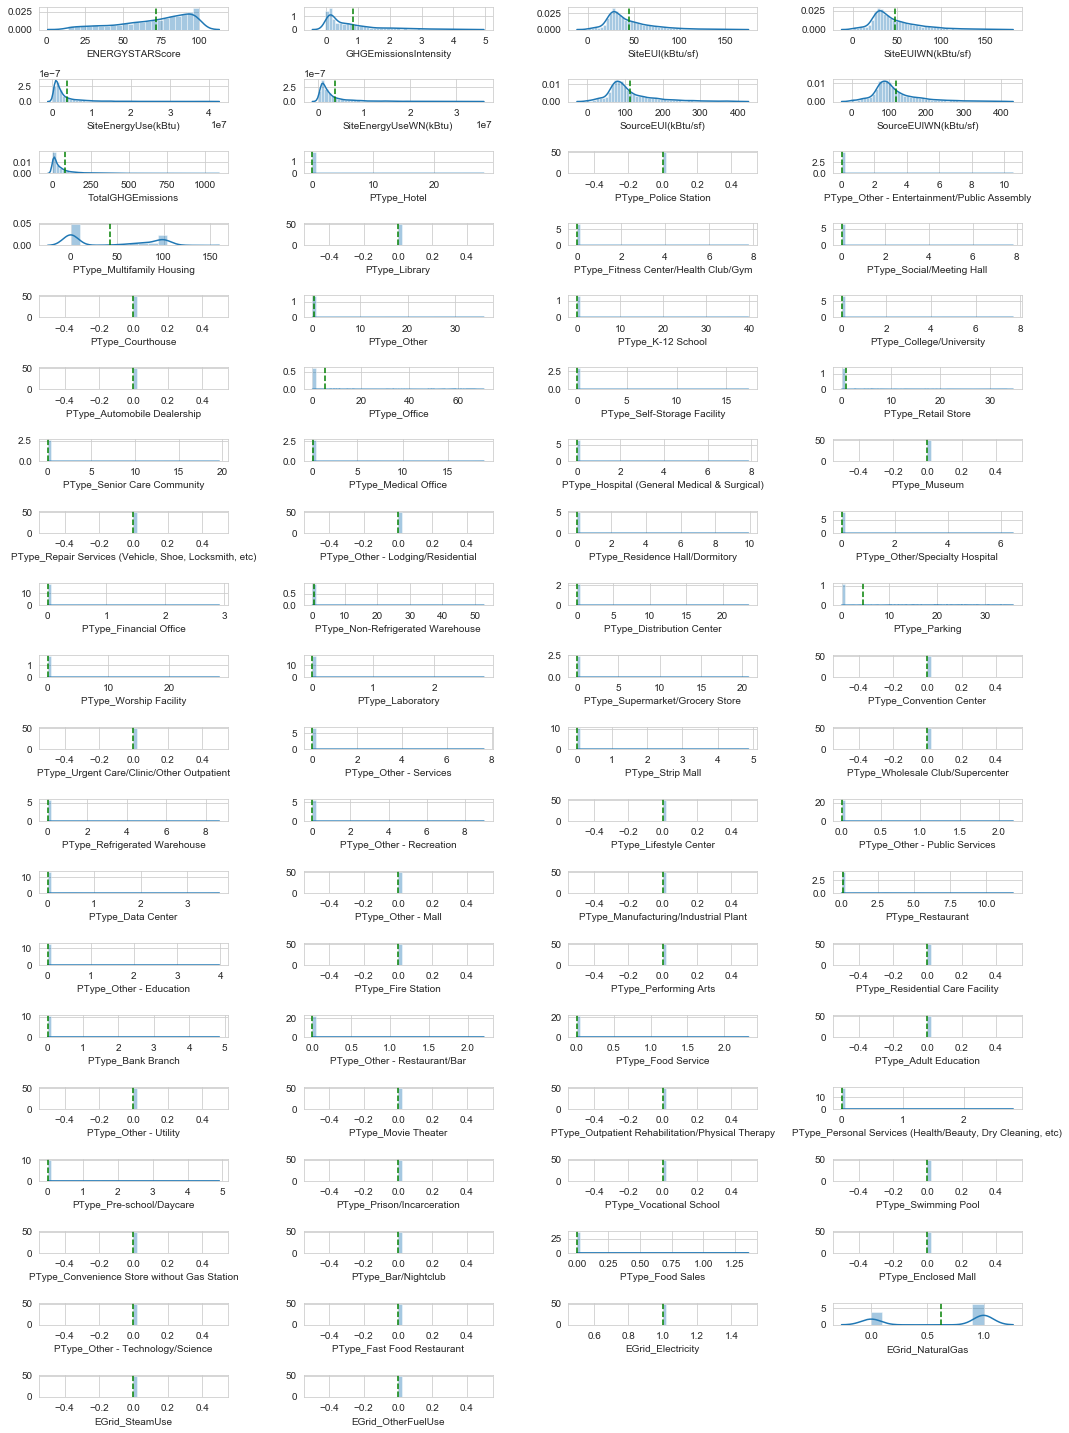

In [50]:
plt.figure(figsize=(15, 20))
for i in range(0, data_num.shape[1]):
    plt.subplot(20,4, i+1)
    df = data_num.iloc[:, i]
    sns.distplot(df.dropna())
    plt.axvline(df.mean(), c='g', ls='--')
plt.tight_layout()
plt.show()

In [ ]:
skew = data_num.iloc[:].skew()
skew.name = "Asymétrie"
kurt = data_num.iloc[:].kurtosis()
kurt.name = 'Coef. aplatissement'
pd.concat([skew, kurt], axis=1)

In [ ]:
def plot_pie(df):
    values = df.value_counts()
    plt.pie(values, labels=values.index, autopct="%.2f%%", radius=1)
    plt.title("Distribution de {}".format(df.name))
    plt.show()

In [ ]:
plot_pie(data['BuildingType'])

In [ ]:
plot_pie(data['Neighborhood'])

### Analyse multi-variés

In [ ]:
df = data_num
plt.figure(figsize=(10, 8))
sns.set()
sns.heatmap(df.corr())
plt.show()

In [ ]:
def bivar_scatter(columns):
    plt.scatter(data[columns[0]], data[columns[1]], marker='.', alpha=0.1)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title("Coefficient de Pearson: %.2f"%data[columns].corr().iloc[0, 1])

In [ ]:
plt.subplots(figsize=(10, 5))

# SiteEUI(kBtu/sf) & SiteEUIWN(kBtu/sf)
plt.subplot(2, 2, 1)
columns = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']
bivar_scatter(columns)

# SiteEnergyUse(kBtu) & SiteEnergyUseWN(kBtu)
plt.subplot(2, 2, 2)
columns = ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']
bivar_scatter(columns)

# SourceEUI(kBtu/sf) & SourceEUIWN(kBtu/sf)
plt.subplot(2, 2, 3)
columns = ['SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']
bivar_scatter(columns)

plt.tight_layout()
plt.show()

In [ ]:
# SiteEnergyUseWN(kBtu) & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'SiteEnergyUseWN(kBtu)']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

In [ ]:
# TotalGHGEmissions & other
plt.subplots(figsize=(15, 30))

for i in range(1, len(df.columns.values) + 1):
    columns = [df.columns.values[i-1], 'TotalGHGEmissions']
    plt.subplot(8, 3, i)
    bivar_scatter(columns)
    
plt.tight_layout()
plt.show()

In [ ]:
def plot_group(columnName, groupName, limMin, limMax):
    G = list(data[groupName].dropna().value_counts().index)
    df = data[[columnName, groupName]].dropna()[data[groupName].isin(G)]
    df_group = df.groupby(groupName).agg('mean').sort_values(columnName)
    G_order = list(df_group.index)
    df = data[[columnName, groupName]].dropna()[data[groupName].isin(G_order)]
    plt.figure(figsize=(15, 40))
    for i in range(1, len(G_order)+1):
        plt.subplot(26, 1, i)
        df2 = df[columnName][df[groupName]== G_order[i-1]]
        sns.distplot(df2, label=G_order[i-1], color=plt.cm.tab10(i/len(G_order)))
        plt.legend(loc="upper right", fontsize='large')
        plt.xlim([limMin, limMax])
    plt.tight_layout()
    plt.show()

In [ ]:
plot_group("TotalGHGEmissions", "BuildingType", -10, 1000)

In [ ]:
plot_group("TotalGHGEmissions", "Neighborhood", -10, 800)

In [ ]:
plot_group("SiteEnergyUseWN(kBtu)", "BuildingType", -10, 100000000)

In [ ]:
plot_group("SiteEnergyUseWN(kBtu)", "Neighborhood", -10, 10000000)

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x="BuildingType", y="SiteEnergyUseWN(kBtu)", data=data)
plt.show()

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x="Neighborhood", y="SiteEnergyUseWN(kBtu)", data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="BuildingType", y="SiteEnergyUseWN(kBtu)", data=data, hue="Neighborhood")
plt.show()

In [ ]:
data.to_csv("data/clean-building-energy-benchmarking.csv", index=False)